In [78]:
import pandas as pd
X = np.array(pd.read_csv("t.csv").values[:, 0]).reshape(-1)
X

array([0, 0, 0, ..., 0, 0, 0])

[6, 8, 1]
Cluster Centers: [6, 8, 1]


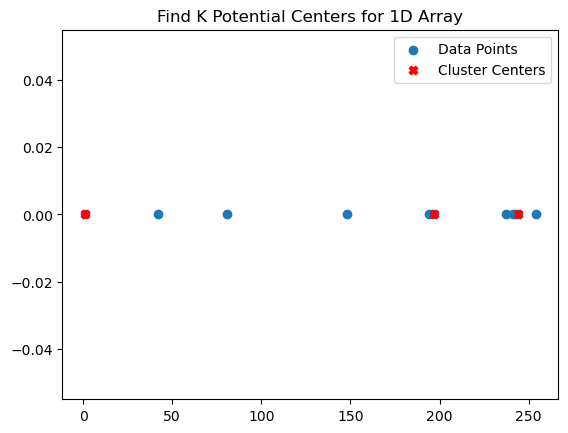

In [133]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, Y, r):
    return np.exp(-(np.abs(x - Y) ** 2) / (2 * r ** 2))

def find_k_potential_centers(X, num_clusters, threshold=0.1, r_a=1.0, r_b=0.5):
    num_points = len(X)
    grid_points = np.arange(num_points)
    potentials = np.zeros(num_points)
    cluster_centers = []
    # Calculate potential for each grid point using Gaussian distance
    for i in range(num_points):
        potentials[i] = np.sum(gaussian_kernel(X[i], X[:i], r_a))

    # Find grid point with maximum potential
    center = np.argmax(potentials)
    cluster_centers.append(center)


    while len(cluster_centers) < num_clusters:
        # Update potentials, reducing the potential of nearby grid points
        new_center = cluster_centers[-1]
        potential = potentials[new_center]

        for i in range(num_points):
            potentials[i] -= potential * gaussian_kernel(X[i], X[new_center], r_b)

        new_max_id = np.argmax(potentials)
        if new_max_id not in cluster_centers:
            cluster_centers.append(new_max_id)
        else:
            p = np.random.randint(0, num_points)
            cluster_centers.append(p)
            print(f"ID {p} was randomly selected.")


    print(cluster_centers)
    return cluster_centers[:num_clusters]  # Return only the first 'num_clusters' cluster centers

# Example usage
X = np.random.randint(0,255,10)
num_clusters = 3

result = find_k_potential_centers(X, num_clusters, r_a=0.1, r_b=0.5)
print("Cluster Centers:", result)

# Plot the data points and cluster centers
plt.scatter(X, np.zeros_like(X), label="Data Points", marker='o')
plt.scatter(X[result], np.zeros_like(result), label="Cluster Centers", marker='X', color='red')
plt.title('Find K Potential Centers for 1D Array')
plt.legend()
plt.show()
